In [84]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import geopandas as gpd
import geodatasets

In [85]:
# Define file path and file name
model_path = '../models/'
model_name = 'basicModel'
image_path = '../data/raw/satellite-images_new-york-city_2022/'

In [86]:
# Load data
df = pd.read_csv(f'{model_path}/{model_name}/metrics_test.csv')
# Load the image
img = cv2.imread(f'{image_path}1.png')
# cv2 stores colors as BGR instead of RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [87]:
nybb = gpd.read_file(geodatasets.get_path('nybb'))
nybb = nybb.to_crs(4326)

In [88]:
# Change font to LaTeX
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': [],

    # Fine-tune font-size
    'font.size': 12.0, # 10.0
    'figure.titlesize': 14.4, # 'large' (12.0)
    'figure.labelsize': 12.0, # 'large' (12.0)
    'axes.titlesize': 12.0, # 'large' (12.0)
    'axes.labelsize': 10.95, # 'medium' (10.0)
    'legend.title_fontsize': 10.95, # None (10.0)
    'legend.fontsize': 10.0, # 'medium' (10.0)
    'xtick.labelsize': 10.0, # 'medium' (10.0)
    'ytick.labelsize': 10.0 # 'medium' (10.0)
    })

In [95]:
def plot_history(model_name):
    # Loading data
    history = pd.read_csv(f'../models/{model_name}/history.csv',
        header=0,
        index_col='epoch')

    # Defining variables for plotting
    x = history.index + 1
    y1 = history.loss_train
    y2 = history.loss_val

    # Plotting data
    fig = plt.figure(figsize=(6.25,4), dpi=300)
    ax = plt.subplot(1, 1, 1)
    ax.plot(x, y1, linestyle='dashed', color='black', label='$RMSE_{train}$')
    ax.plot(x, y2, color='#c1272d', label='$RMSE_{val}$')

    # Defining axis limits
    max_x = max(x)
    min_x = min(x)
    max_y = max(max(y1), max(y2))
    min_y = min(min(y1), min(y2))

    # Setting axis limits
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y - 0.1 * (max_y - min_y), max_y + 0.1 * (max_y - min_y))

    # Creating labels and legend
    ax.set_xlabel('Epoch')
    ax.set_ylabel('MSE')
    ax.legend(frameon=False)

    # Saving plot
    file_name = f'../models/{model_name}/history'
    plt.savefig(f'{file_name}.png', transparent=True, bbox_inches='tight')
    plt.close()

In [96]:
plot_history('basicModel')

In [ ]:
# Create a GeoDataFrame with a single polygon representing the extent of the image
min_lon, max_lon = YOUR_MIN_LONGITUDE, YOUR_MAX_LONGITUDE
min_lat, max_lat = YOUR_MIN_LATITUDE, YOUR_MAX_LATITUDE

geometry = gpd.GeoSeries([Polygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])])
gdf = gpd.GeoDataFrame(geometry=geometry)

# Set the Coordinate Reference System (CRS) of the GeoDataFrame
gdf.crs = 'EPSG:4326'  # Assuming WGS84 geographic CRS

# Plot the GeoDataFrame with the satellite image as the background
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, facecolor='none', edgecolor='black')
ax.imshow(image, extent=(min_lon, max_lon, min_lat, max_lat), origin='upper')

# Add gridlines and labels
ax.set_xticks([min_lon, max_lon], crs='EPSG:4326')
ax.set_yticks([min_lat, max_lat], crs='EPSG:4326')
ax.gridlines(draw_labels=True, linestyle='--')

# Set the title of the plot
ax.set_title('Satellite Image')

# Show the plot
plt.show()

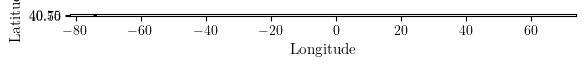

In [83]:
# Initialise figure
textwidth = 6.3 # a4_width - 2 * margin = 8.3in - 2 * 2in = 6.3in
fig, ax = plt.subplots(figsize=(textwidth, 4))

# Plot data
ax.imshow(img, extent=(-73.8, 73.9, 40.8, 40.9))
nybb.plot(ax=ax, alpha=0.5, edgecolor="k")

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set axis ticks
# ax.xaxis.set_major_locator(matplotlib.dates.DayLocator(interval=1, tz='EST'))
# ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d\n%a', usetex=False))

# Set axis limits
# x_min = min(df.index)
# x_max = max(df.index)
# y_min = min(min(df.col1), min(df.col2))
# y_max = max(max(df.col1), max(df.col2))
# ax.set_xlim(x_min, x_max + pd.Timedelta(.5, 'days'))
# ax.set_ylim(y_min - 0.1 * (y_max - y_min), y_max + 0.1 * (y_max - y_min))

# Remove figure padding
plt.tight_layout(pad=0.1) # pad=0 can lead to text being cut off
left = max(fig.subplotpars.left, 1 - fig.subplotpars.right)
spine_top_rel_height = ax.spines['top'].get_linewidth() / 72 / fig.get_size_inches()[1]
fig.subplots_adjust( # does not work in .ipynb
    left=left,
    right=1 - left,
    top=1 - .5 * spine_top_rel_height if ax.get_title() == '' else fig.subplotpars.top)

# Save figure
fig.savefig(f'{model_path}/{model_name}/figure.pdf', dpi=300) # set dpi for any rasterized parts of figure
plt.show()
plt.close()

In [65]:
nybb = gpd.read_file(geodatasets.get_path('nybb'))
nybb = nybb.to_crs(4326)

In [69]:
ax = nybb.plot(alpha=0.5, edgecolor="k")

NameError: name 'nybb' is not defined